## Importing libraries and data

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'zxSfYzyXoWD4WJRfVPRq'

In [3]:
# Import the university ratings data

path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #6\Achievement #6 Project Files'
ratings = pd.read_csv(os.path.join(path, '02 Project Datasets', 'Original Data', 'shanghai_uni_ratings.csv'), index_col = False)
countries = pd.read_csv(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'uni_countries.csv'), index_col = False)

In [4]:
ratings.head()

,world_rank,institution,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [5]:
ratings.shape

(4897, 11)

In [6]:
ratings.dtypes

world_rank        object
institution       object
national_rank     object
total_score      float64
alumni           float64
award            float64
hici             float64
ns               float64
pub              float64
pcp              float64
year               int64
dtype: object

In [7]:
countries.head()

,institution,country
0,Harvard University,United States of America
1,Massachusetts Institute of Technology,United States of America
2,Stanford University,United States of America
3,University of Cambridge,United Kingdom
4,California Institute of Technology,United States of America


In [8]:
countries.shape

(1024, 2)

In [9]:
countries.dtypes

institution    object
country        object
dtype: object

In [10]:
# The Shanghai world university rankings dataset does not have a country for columns, 
# so we must merge that in from another rankings dataset.

ratings_2 = ratings.merge(countries, on = 'institution', indicator = True)

In [11]:
ratings_2.head()

,world_rank,institution,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country,_merge
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America,both
1,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,2006,United States of America,both
2,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,2007,United States of America,both
3,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,2008,United States of America,both
4,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,2009,United States of America,both


In [12]:
ratings_2.shape

(3347, 13)

In [29]:
ratings_2.isnull().sum()

world_rank          0
institution         0
national_rank       0
total_score      2621
alumni              0
award               1
hici                1
ns                  3
pub                 1
pcp                 1
year                0
country             0
_merge              0
dtype: int64

In [34]:
# Drop rows without the variable to be explored, "total_score"
ratings_2 = ratings_2.dropna(subset = ['total_score'])

In [35]:
ratings_2.isnull().sum()

world_rank       0
institution      0
national_rank    0
total_score      0
alumni           0
award            0
hici             0
ns               0
pub              0
pcp              0
year             0
country          0
_merge           0
dtype: int64

In [36]:
ratings_2['year'].value_counts()

year
2007    67
2009    67
2010    67
2015    67
2005    66
2006    66
2008    66
2011    66
2012    65
2013    65
2014    64
Name: count, dtype: int64

## Data Wrangling

In [37]:
# Examine different countries to find a single country to focus on
# Check Japan's depth of universities in the dataset
ratings_2.loc[ratings_2['country'] == 'Japan']['institution'].value_counts()

institution
Kyoto University                 11
Osaka University                 11
Tohoku University                 7
Nagoya University                 7
Tokyo Institute of Technology     3
Name: count, dtype: int64

In [38]:
# Check the annual average total scores of a few different countries
country_agg = ratings_2.groupby(['country', 'year']).agg({'total_score' : 'mean'}).reset_index()

In [43]:
japan = country_agg.loc[country_agg['country'] == 'Japan']
japan

,country,year,total_score
64,Japan,2005,31.375000
65,Japan,2006,29.940000
66,Japan,2007,29.340000
67,Japan,2008,32.966667
68,Japan,2009,30.575000
69,Japan,2010,30.725000
70,Japan,2011,29.050000
71,Japan,2012,30.533333
72,Japan,2013,33.150000
73,Japan,2014,33.350000


In [40]:
country_agg.loc[country_agg['country'] == 'United States of America']

,country,year,total_score
130,United States of America,2005,42.327027
131,United States of America,2006,42.081081
132,United States of America,2007,42.091892
133,United States of America,2008,42.054054
134,United States of America,2009,41.434211
135,United States of America,2010,41.697297
136,United States of America,2011,42.341667
137,United States of America,2012,42.269444
138,United States of America,2013,42.685714
139,United States of America,2014,40.411111


In [41]:
country_agg.loc[country_agg['country'] == 'United Kingdom']

,country,year,total_score
119,United Kingdom,2005,40.157143
120,United Kingdom,2006,39.800000
121,United Kingdom,2007,39.457143
122,United Kingdom,2008,39.828571
123,United Kingdom,2009,39.900000
124,United Kingdom,2010,39.728571
125,United Kingdom,2011,42.400000
126,United Kingdom,2012,42.016667
127,United Kingdom,2013,42.016667
128,United Kingdom,2014,45.700000


In [42]:
country_agg.loc[country_agg['country'] == 'China']

,country,year,total_score


For this task, I will pick one country and use the average university scores from that country each year for my time-series analysis.

In [58]:
japan.columns

Index(['country', 'year', 'total_score'], dtype='object')

In [62]:
# Choose Japan as the subject country and create a subset of the data suitable for time series analysis
japan_sub = japan[['year', 'total_score']]
japan_sub

,year,total_score
64,2005,31.375000
65,2006,29.940000
66,2007,29.340000
67,2008,32.966667
68,2009,30.575000
69,2010,30.725000
70,2011,29.050000
71,2012,30.533333
72,2013,33.150000
73,2014,33.350000


In [63]:
japan_sub.columns

Index(['year', 'total_score'], dtype='object')

In [64]:
# Set the "year" column as the index

from datetime import datetime

japan_sub['datetime'] = pd.to_datetime(japan_sub['year'], format = '%Y') 
japan_sub = japan_sub.set_index('datetime') 
japan_sub.drop(['year'], axis=1, inplace=True) 
japan_sub.head()

,total_score
datetime,
2005-01-01,31.375000
2006-01-01,29.940000
2007-01-01,29.340000
2008-01-01,32.966667
2009-01-01,30.575000


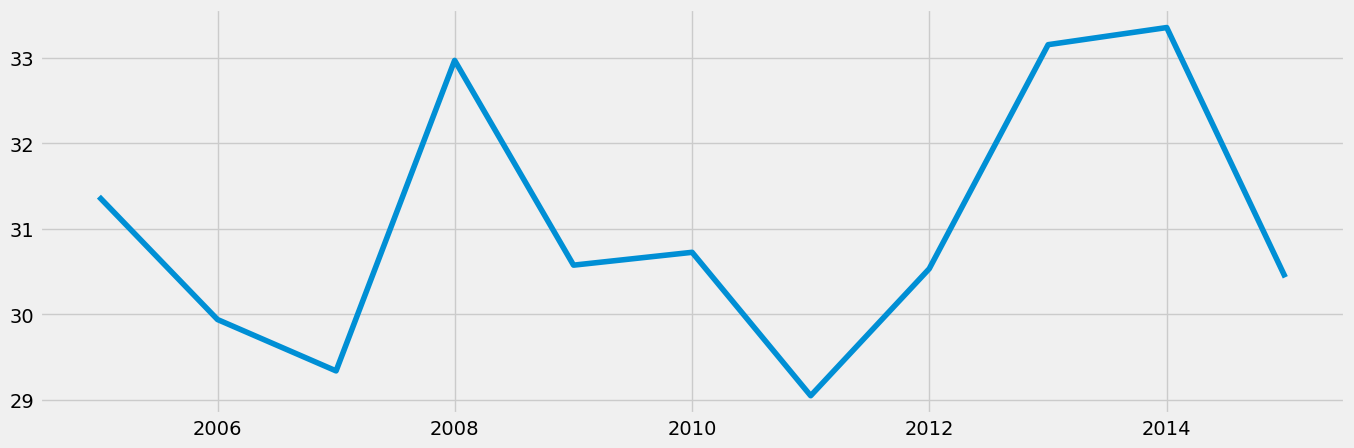

In [65]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(japan_sub)

In [ ]:
# Further data cleaning

In [66]:
japan_sub.isnull().sum()

total_score    0
dtype: int64

In [67]:
dups = japan_sub.duplicated()
dups.sum()

0

## Decomposition

In [68]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(japan_sub, model='additive')

In [69]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

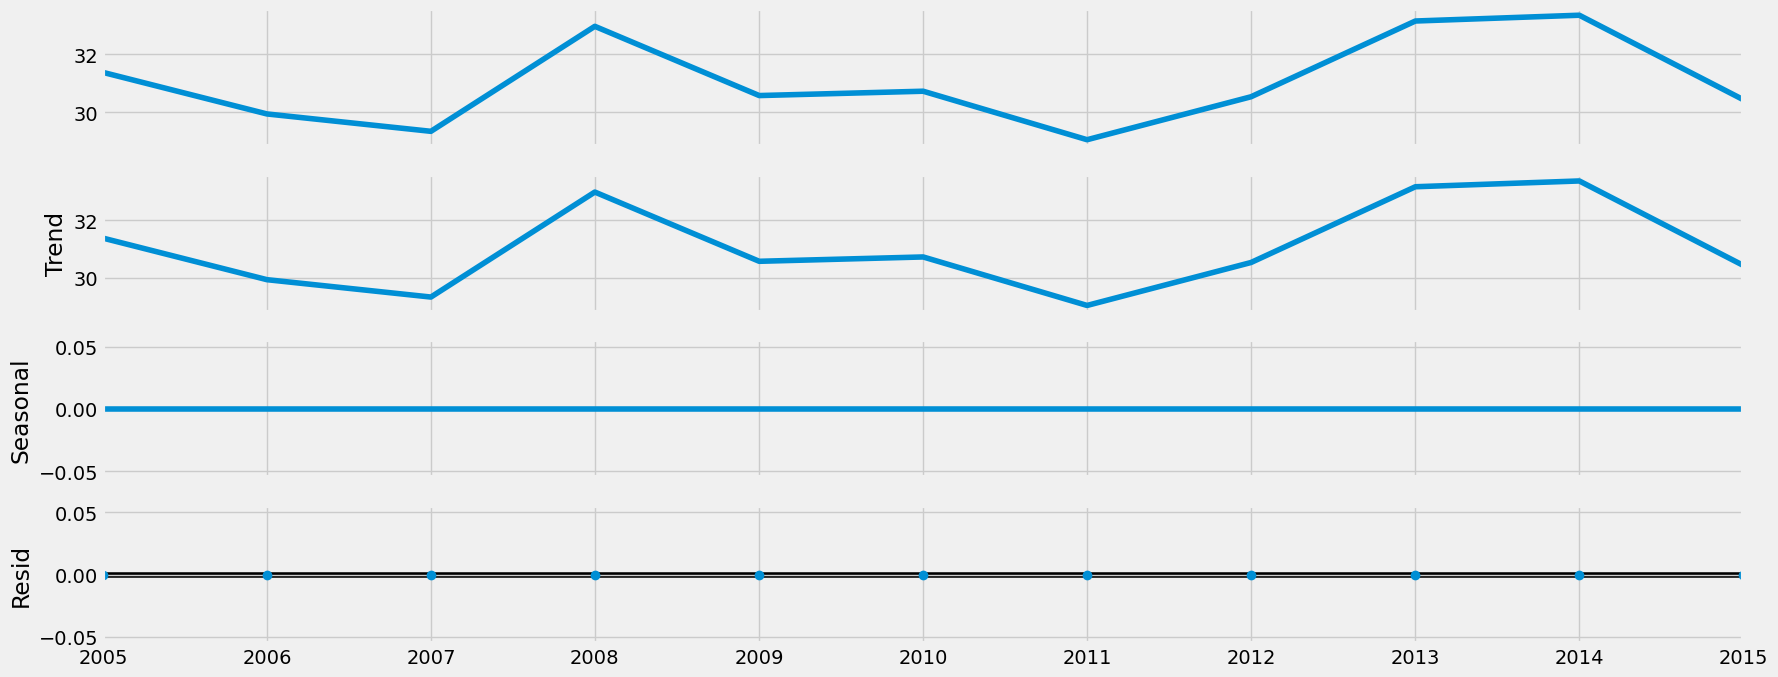

In [70]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend appears to be identical to the level. This trend seems to reflect a slight cycle where the average total score fluctuates slightly up and down every few years. There appears to be no seasonality. This is likely because the events in the dataset occur once every year instead of multiple times per year, so the data may not be granular enough for seasonality to be applicable. There also appears to be no noise.

## Testing for stationarity

In [71]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(japan_sub['total_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.937092
p-value                        0.314818
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In order to determine that the data is stationary, we have to show that there is no unit root present in the data.
The null hypothesis is that there is a unit root. The alternative hypothesis is that there is no unit root.

In order to disprove the null hypothesis, our test statistic must be lower than the critical value at the significance level we are using. The p-value of our statistical test must also be less than 0.05. 

The results of the test above do not meet those thresholds, so a round of differencing must be conducted.

In [72]:
# Round 1 of Differencing
japan_diff = japan_sub - japan_sub.shift(1)

In [73]:
# Remove missing values produced from the differencing
japan_diff.dropna(inplace = True) 

In [74]:
japan_diff.head()

,total_score
datetime,
2006-01-01,-1.435000
2007-01-01,-0.600000
2008-01-01,3.626667
2009-01-01,-2.391667
2010-01-01,0.150000


In [76]:
japan_diff.columns

Index(['total_score'], dtype='object')

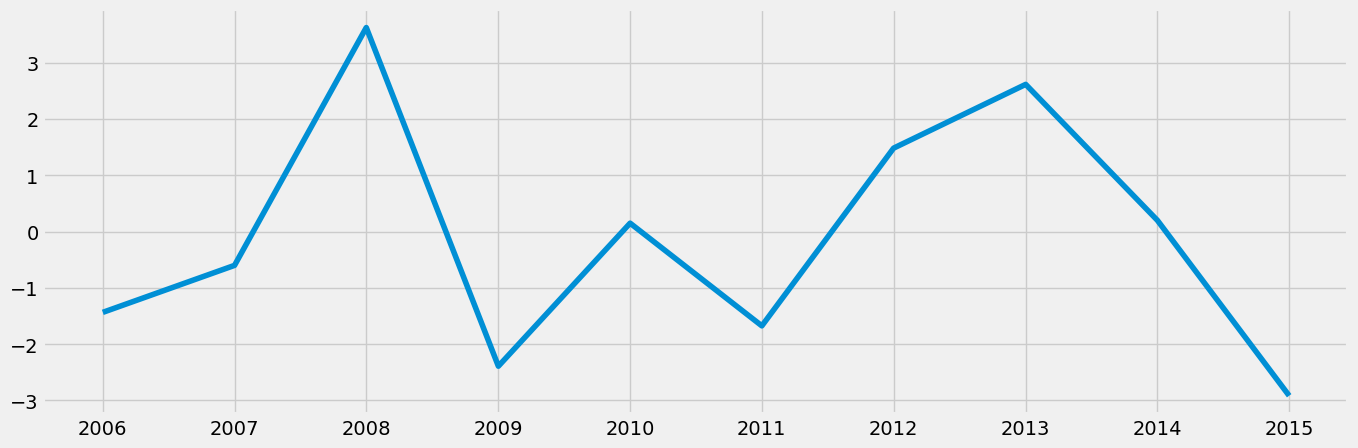

In [78]:
# Effects of differencing visualized

plt.figure(figsize=(15,5), dpi=100)
plt.plot(japan_diff)

In [79]:
dickey_fuller(japan_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.379309e+01
p-value                        8.851353e-26
Number of Lags Used            3.000000e+00
Number of Observations Used    6.000000e+00
Critical Value (1%)           -5.354256e+00
Critical Value (5%)           -3.646238e+00
Critical Value (10%)          -2.901198e+00
dtype: float64


The test statistic is -13.79309. This is lower than the Critical Value (5%), -3.646238. It is also lower than the two other critical values. The p-value is 8.851353 x 10^-26, which is lower than 0.05.

The results passes the thresholds, so we can move onto the next step and check for autocorrelation.

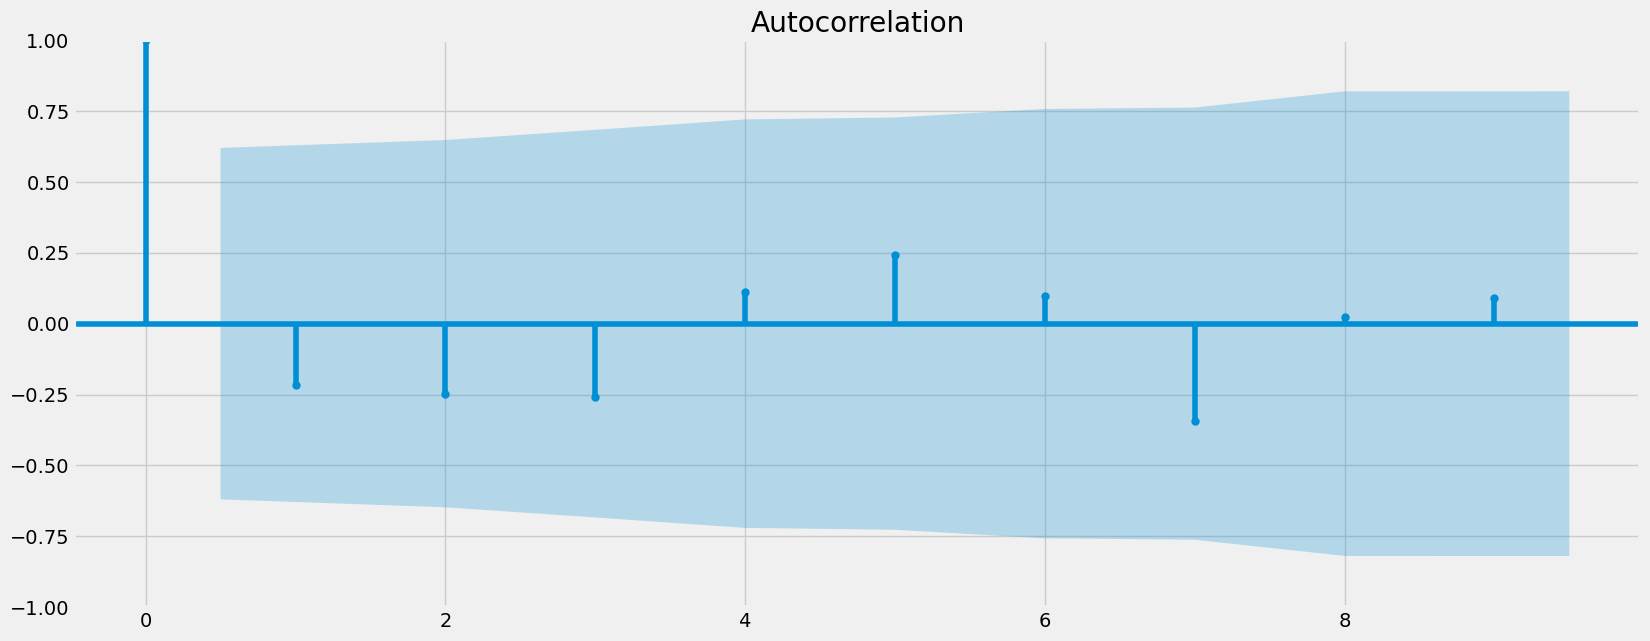

In [81]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(japan_diff)
plt.show()

None of the lag bars are tall enough to exceed the area covered by the confidence interval.